$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  



In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [ ]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [ ]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A,x): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  numerator=np.dot(evalg(x).transpose(),evalg(x))    
  denominator=2*np.dot(np.dot(evalg(x).transpose(),A),evalg(x))
  step_length=numerator/denominator

  
  return step_length


\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In [ ]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p=-gradf
  while evalf(x+alpha*p)> evalf(x)+gamma*alpha*(np.dot(evalg(x).transpose(),p)):
    alpha=alpha*rho
  return alpha

In [ ]:
grad=evalg(np.array([1,1]))

In [ ]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A,x) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 


$\large \text{[R]} \\ \text{Note down the minimizer and minimum function value of }f(x) = f(x_1, x_2) = (x_1 − 8)^2 + (x_2 + 12)^2. $

In [ ]:

my_start_x = np.array([1,1])
my_tol= 1e-5

print('Solution using constant_step_length(0.1)')
x_opt,number_of_iter = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print('Minimizer of function:',x_opt)
print('Minuimum function value:',evalf(x_opt))
print('number of iterations:',number_of_iter)
print('---------------------------------------------------------------------')
print('Solution using closed-form expression')
x_opt_cls,number_of_iter_cls=find_minimizer(my_start_x,my_tol,EXACT_LINE_SEARCH)
print('Minimizer of function:',x_opt_cls)
print('Minuimum function value:',evalf(x_opt_cls))
print('number of iterations:',number_of_iter_cls)
print('---------------------------------------------------------------------')
#check what happens when you call find_minimzer using backtracking line search
print('Solution using backtracking line search')
x_opt_bls,number_of_iter_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('Minimizer of function:',x_opt_bls)
print('Minuimum function value:',evalf(x_opt_bls))
print('number of iterations:',number_of_iter_bls)


Solution using constant_step_length(0.1)
Minimizer of function: [  7.99999775 -11.99999582]
Minuimum function value: 2.2517218946096954e-11
number of iterations: 67
---------------------------------------------------------------------
Solution using closed-form expression
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1
---------------------------------------------------------------------
Solution using backtracking line search
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1


$\large \text{ Above result shows minimizer for function and minimum function value in various ways of finding step length.} $

$\large \text{[R]} \text{Consider stopping tolerance} \\ τ = 10^{−12} \text{and starting point} \ x_0 = (25, 25). \\ \text{ Compare the number of iterations taken by the gradient descent procedure which uses exact step length computation against the gradient descent} \\ \text{procedure which uses the backtracking line search procedure (with} α_0 = 1, ρ = 0.5, γ = 0.5). \text{Comment on your observations.} $

In [ ]:
Start_upd=np.array([25,25])
tol_upd=1e-12
print('Solution using closed-form expression')
x_opt_cls,number_of_iter_cls=find_minimizer(Start_upd,tol_upd,EXACT_LINE_SEARCH)
print('Minimizer of function:',x_opt_cls)
print('Minuimum function value:',evalf(x_opt_cls))
print('number of iterations:',number_of_iter_cls)
print('---------------------------------------------------------------------')
#check what happens when you call find_minimzer using backtracking line search
print('Solution using backtracking line search')
x_opt_bls,number_of_iter_bls = find_minimizer(Start_upd,tol_upd, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('Minimizer of function:',x_opt_bls)
print('Minuimum function value:',evalf(x_opt_bls))
print('number of iterations:',number_of_iter_bls)


Solution using closed-form expression
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1
---------------------------------------------------------------------
Solution using backtracking line search
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1


$ \\ \text{As we can see that number of iterations in both ways(exact step length computation,backtracking line search procedure) are equal to 1} \\ \text{ so we can see that in this condition when starting point is [25,25] and tolerance value is 1e-12 } $

$\text{[R] With starting point} \ x_0 = (25, 25) \ \text{ and} \ τ = 10^{−10} \\ \text{we will now study the behavior of the backtracking line search algorithm for different choices of} \  \alpha_0.\ \text{Take} \ γ = ρ = 0.5. \\ \text{ Try} \ \alpha_0 ∈ \{1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}.$
For each α0, record the final minimizer, final objective function value and number of iterations taken by the
gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of
iterations is plotted against α0 values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the α0 values. Check and comment if for any α0
value, gradient descent with backtracking line search takes lesser number of iterations when compared to the
gradient descent procedure with exact line search.

In [ ]:
Start_upd=np.array([25,25])
tol_upd=1e-10
alpha_0=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
iter_list=[]
print('Solution using closed-form expression')
x_opt_cls,number_of_iter_cls=find_minimizer(Start_upd,tol_upd,EXACT_LINE_SEARCH)
print('Minimizer of function:',x_opt_cls)
print('Minuimum function value:',evalf(x_opt_cls))
print('number of iterations:',number_of_iter_cls)
print('---------------------------------------------------------------------')
#check what happens when you call find_minimzer using backtracking line search
print('Solution using backtracking line search')
for alpha in alpha_0:
  x_opt_bls,number_of_iter_bls = find_minimizer(Start_upd,tol_upd, BACKTRACKING_LINE_SEARCH, alpha, 0.5,0.5)
  iter_list.append(number_of_iter_bls)
  print('initial value of alpha:',alpha)
  print('Minimizer of function:',x_opt_bls)
  print('Minuimum function value:',evalf(x_opt_bls))
  print('number of iterations:',number_of_iter_bls)
  print('---------------------------------------------------------------------------')

Solution using closed-form expression
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1
---------------------------------------------------------------------
Solution using backtracking line search
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
initial value of alpha: 1
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1
---------------------------------------------------------------------------
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
initial value of alpha: 0.9
Minimizer of function: [  8. -12.]
Minuimum function value: 1.6579714975258972e-21
number of iterations: 12
---------------------------------------------------------------------------
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
initial value of alpha: 0.75
Minimizer of function: [  8. -12.]
Minuimum function value: 1.3714654556129199e-21
number of iterations: 20
----------------------------

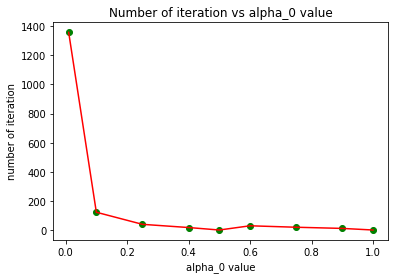

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alpha_0,iter_list,color='r')
plt.scatter(alpha_0,iter_list,color='g')
plt.title('Number of iteration vs alpha_0 value')
plt.xlabel('alpha_0 value')
plt.ylabel('number of iteration')
plt.show()

$ \text{ Here we can easily observe that when value of alpha is near to zero than gradient descent takes high number of iterations} \\ $ \\
 but as soon as alplha value increases and tends to zero it starts decreasing and at value 0.5 , we get minimum number of iterations which is 1 and as we increase value of alpha more than 0.5 than number of iterations again start increasing and increase slowly thus we can conclude that small alpha value results more number of iterations. 

 Here we can observe that for alpha =1 and alpha=0.5 we get number of iterations is 1 which is minimum and for all other values of alpha our gradient descent method take more number of iterations to reach optimal condition and when we use exact line search to find step length, it also takes one iteration to reach optimal condition. So there is no values of alpha where we got number of iterations less than number of iterations to reach optial condition in exact line search methoed to find step_length.

$\large \text{[R]}$  $ \text{With starting point} \ x0 = (25, 25)  \ \text{and} \  τ = 10^{−10} \ \text{,we will now study the behavior of the backtracking line search algorithm for different choices of } \ ρ. \text{Take} \ α = 1, γ = 0.5. \ \text{Try} \ $ $ ρ ∈ \{{0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}}.$ \\
For each ρ, record the final minimizer, final objective function value and number of iterations taken by the
gradient descent algorithm with backtracking line search to terminate. Prepare a plot where the number of
iterations is plotted against ρ values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the ρ values. Check and comment if for any ρ value,
gradient descent with backtracking line search takes lesser number of iterations when compared to the gradient
descent procedure with exact line search.

In [ ]:
Start_upd=np.array([25,25])
tol_upd=1e-10
rho_list=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
alpha=1
iter_list_1=[]
print('Solution using closed-form expression')
x_opt_cls,number_of_iter_cls=find_minimizer(Start_upd,tol_upd,EXACT_LINE_SEARCH)
print('Minimizer of function:',x_opt_cls)
print('Minuimum function value:',evalf(x_opt_cls))
print('number of iterations:',number_of_iter_cls)
print('---------------------------------------------------------------------')
#check what happens when you call find_minimzer using backtracking line search
print('Solution using backtracking line search')
for rho in rho_list:
  x_opt_bls,number_of_iter_bls = find_minimizer(Start_upd,tol_upd, BACKTRACKING_LINE_SEARCH, alpha, rho,0.5)
  iter_list_1.append(number_of_iter_bls)
  print('initial value of rho:',rho)
  print('Minimizer of function:',x_opt_bls)
  print('Minuimum function value:',evalf(x_opt_bls))
  print('number of iterations:',number_of_iter_bls)
  print('---------------------------------------------------------------------------')

Solution using closed-form expression
Minimizer of function: [  8. -12.]
Minuimum function value: 0.0
number of iterations: 1
---------------------------------------------------------------------
Solution using backtracking line search
Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
initial value of rho: 0.9
Minimizer of function: [  8. -12.]
Minuimum function value: 4.960536411900771e-22
number of iterations: 9
---------------------------------------------------------------------------
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
initial value of rho: 0.75
Minimizer of function: [  8. -12.]
Minuimum function value: 1.0819468296335504e-21
number of iterations: 15
---------------------------------------------------------------------------
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
initial value of rho: 0.6
Minimizer of function: [  8. -12.]
Minuimum function value: 7.844395544174143e-22
number of iterations: 22
-------------------

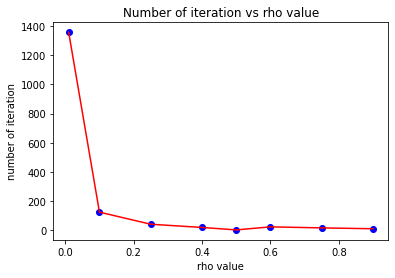

In [ ]:
plt.plot(rho_list,iter_list_1,color='r')
plt.scatter(rho_list,iter_list_1,color='b')
plt.title('Number of iteration vs rho value')
plt.xlabel('rho value')
plt.ylabel('number of iteration')
plt.show()

$\large \text{Explaination of plot}$

$\large $As the above plot explains that when row value goes near to 0 than gradient descent take high number of iterations to reach optiaml condition and as value of rho reaches to 0.5 it take minimum number of itartions(1) to reach optimal conditions.

$\large \text{Observations about minimizers and minimum function value:}$ 

As we can see that for each value of rho the minimum function value is zero or so small quantity which is approximately equal to zero. Similarly for each value of rho, minimizers are [8,-12] or almost equal to these values.

$\large \text{Comparison of number of iterations based on  methos of finding step_length} $ 

By above results we know that number of iterations is 1 when we use exact line search method to find step_lenght and if we take different rho values in backtracking line search method we get different number of methods and minimum number of iterations are 1 corresponding to rho 0.5 so there is no value of rho which can give us lower number of iterations to reach optimal conditions in comparison of exact line search method to find step length method.